In [1]:
# ST1510 PDAS CA1 Assignment
# Name: Yadanar Aung
# Admin No.: P2214621
# Class: DAAA/FT/1B/02

In [2]:
# ****************************************** Importing Libraries ***************************************************************

import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
# *************************************** Load & Initialise the 3 Datasets *****************************************************

# note: my side file path = datasets/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.txt
#       user side file path = ../datasets/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.txt

# (1) dataset 1: graduate employment survey: 
# Data contains information employment rate and basic & gross monthly salary per School in each SG University from 2013 to 2020
graduate_Employment_Survey = np.genfromtxt("datasets/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.txt", 
                                         delimiter = "\t", names = True, missing_values = "na", 
                                         dtype = [("year", "i8"), ("university", "U100"), 
                                                  ("school", "U100"), ("degree", "U100"), 
                                                  ("employment_rate_overall", "f8"), 
                                                  ("employment_rate_ft_perm", "f8"), 
                                                  ("basic_monthly_mean", "i8"),
                                                  ("basic_monthly_median", "i8"),
                                                  ("gross_monthly_mean", "i8"), 
                                                  ("gross_monthly_median", "i8"), 
                                                  ("gross_mthly_25_percentile", "i8"), 
                                                  ("gross_mthly_75_percentile", "i8")])

# (2) dataset 2: universities intake enrolment and graduates by course
# Data contains information about number of intake, enrolment & graduates, according to gender, 
# by course in Universities from the 2005 to 2021
universities_Intake_Enrolment_And_Graduates_By_Course = np.genfromtxt("datasets/universities-intake-enrolment-and-graduates-by-course.txt", 
                                                                      delimiter = "\t", names = True, invalid_raise = False,
                                                                      missing_values = "na",
                                                                      dtype = [("year", "i4"), ("sex", "U255"), 
                                                                               ("course", "U100"), ("intake", "i8"), 
                                                                               ("enrolment", "i8"),("graduates", "i8")])
                                       
# (3) dataset 3: graduates-by-institutions.csv
# Data contains information about the number of graduates, according to gender, 
# from all institutions in Singapore from 1983 to 2020
graduates_By_Institutions = np.genfromtxt("datasets/graduates-by-institutions.csv", delimiter = ",", names = True, 
                                          deletechars = "-", missing_values = "na", invalid_raise = True, 
                                          dtype = [("year", "i4"), ("sex", "U255"), ("nus", "i8"), ("ntu", "i8"), ("smu", "i8"),
                                                   ("sit", "i8"), ("sutd", "i8"), ("suss", "i8"), ("nie", "i8"), 
                                                   ("singapore_polytechnic", "i8"), ("ngee_ann_polytechnic", "i8"), 
                                                   ("temasek_polytechnic", "i8"), ("nanyang_polytechnic", "i8"),
                                                   ("republic_polytechnic", "i8"), ("lasalle_diploma", "i8"),
                                                   ("lasalle_degree", "i8"), ("nafa_diploma", "i8"), ("nafa_degree", "i8"), 
                                                   ("ite", "i8")])

In [4]:
#*************************************** Numpy Analysis & Data Cleaning / Wrangling ********************************************


# (1) Data Breakdown for graduate_Employment_Survey **************************************************************************

print(f"**** Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD ****")
dataset1 = graduate_Employment_Survey
# No. of Rows & Columns in dataset
print(f"\nThere are {len(dataset1)} rows and {len(dataset1[0])} columns in this dataset")

# Looping through different columns to get their data type
print(f"\nThe names of the columns are: ")
for i in range(len(dataset1[0])): # to access header row
    print(f"- {dataset1.dtype.names[i]} {type(dataset1[2][i])}")
    
# Find out the years, universities & schools accounted for in the dataset
dataset1_Years = np.unique(dataset1['year'])
print(dataset1_Years)
print(f'\nNumber of years data was collected for is {len(dataset1_Years)}, from {dataset1_Years[0]} to {dataset1_Years[-1]}.')

dataset1_University = np.unique(dataset1['university'])
print(f'\nCourses accounted for are {dataset1_University}.')

**** Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD ****

There are 1121 rows and 12 columns in this dataset

The names of the columns are: 
- year <class 'numpy.int64'>
- university <class 'numpy.str_'>
- school <class 'numpy.str_'>
- degree <class 'numpy.str_'>
- employment_rate_overall <class 'numpy.float64'>
- employment_rate_ft_perm <class 'numpy.float64'>
- basic_monthly_mean <class 'numpy.int64'>
- basic_monthly_median <class 'numpy.int64'>
- gross_monthly_mean <class 'numpy.int64'>
- gross_monthly_median <class 'numpy.int64'>
- gross_mthly_25_percentile <class 'numpy.int64'>
- gross_mthly_75_percentile <class 'numpy.int64'>
[2013 2014 2015 2016 2017 2018 2019 2020 2021]

Number of years data was collected for is 9, from 2013 to 2021.

Courses accounted for are ['Nanyang Technological University' 'National University of Singapore'
 'Singapore Institute of Technology' 'Singapore Management University'
 'Singapore University of Social Sciences'
 'Singapore University

In [5]:
# (1) Cleaning Dataset 1 ******************************************************************************************************

# 1. Cleansed data under column "school" due to varied naming convetions across the years 1983 to 2020

# View all unique school names before cleaning to check which school names to standarise across the years
unique_schoolNames = np.unique(dataset1['school'])
print("\n", unique_schoolNames)

# School of Accountancy (4-years programme)*, School of Accountancy (4-years programme)* 
# standarised to School of Accountancy (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Accountancy (4-year programme) *", 
                              "School of Accountancy (4-year programme)", dataset1["school"])
dataset1["school"] = np.where(dataset1["school"] == "School of Accountancy (4-years programme) *", 
                              "School of Accountancy (4-year programme)", dataset1["school"])

# School of Business (4-years programme) *, School of Business (4-year programme) * 
# standarised to School of Business (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Business (4-years programme) *", 
                              "School of Business (4-year programme)", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "School of Business (4-year programme) *", 
                              "School of Business (4-year programme)", dataset1["school"])

# School of Information Systems (4-year programme) *, School of Information Systems (4-years programme) * 
# standarised to School of Information Systems (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Information Systems (4-year programme) *", 
                              "School of Information Systems (4-year programme)", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "School of Information Systems (4-years programme) *", 
                              "School of Information Systems (4-year programme)", dataset1["school"])

# School of Economics (4-year programme) * , School of Economics (4-years programme) * 
# standarised to School of Economics (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Economics (4-year programme) *", 
                              "School of Economics (4-year programme)", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "School of Economics (4-years programme) *", 
                              "School of Economics (4-year programme)", dataset1["school"])

# School of Law (4-year programme) *, School of Law (4-years programme) * 
# standarised to School of Law (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Law (4-year programme) *", 
                              "School of Law (4-year programme)", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "School of Law (4-years programme) *", 
                              "School of Law (4-year programme)", dataset1["school"])

# School of Social Sciences (4-year programme) *, School of Social Sciences (4-years programme) * 
# standarised to School of Social Sciences (4-year programme)
dataset1["school"] = np.where(dataset1["school"] == "School of Social Sciences (4-year programme) *", 
                              "School of Social Sciences (4-year programme)", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "School of Social Sciences (4-years programme) *", 
                              "School of Social Sciences (4-year programme)", dataset1["school"])

# Singapore Institute of Technology, Singapore Institute of Technology (SIT) 
# standarised to Singapore Institute of Technology
dataset1["school"] = np.where(dataset1["school"] == "Singapore Institute of Technology (SIT)", 
                              "Singapore Institute of Technology", dataset1["school"])

# College of Sciences, College of Science 
# standarised to College of Science
dataset1["school"] = np.where(dataset1["school"] == "College of Sciences", 
                              "College of Science", dataset1["school"])

# YLL School of Medicine, Yong Loo Lin School (Medicine) 
# standarised to Young Loo Lin School (Medicine)
dataset1["school"] = np.where(dataset1["school"] == "YLL School of Medicine", 
                              "Yong Loo Lin School (Medicine)", dataset1["school"])

# Multi-Disciplinary Programmes, Multi-Disciplinary Programme, Multidisciplinary Programmes 
# standarised to Multi-Disciplinary Programme
dataset1["school"] = np.where(dataset1["school"] == "Multidisciplinary Programmes", 
                              "Multi-Disciplinary Programme", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "Multi-Disciplinary Programmes", 
                              "Multi-Disciplinary Programme", dataset1["school"])

# YST Conservatory Of Music, Yong Siew Toh Conservatory of Music, YST Conservatory of Music 
#standarised to Yong Siew Toh Conservatory of Music
dataset1["school"] = np.where(dataset1["school"] == "YST Conservatory Of Music", 
                              "Yong Siew Toh Conservatory of Music", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "YST Conservatory of Music", 
                              "Yong Siew Toh Conservatory of Music", dataset1["school"])

# School Of Computing, School of Computing 
# standarised to School of Computing
dataset1["school"] = np.where(dataset1["school"] == "School Of Computing", 
                              "School of Computing", dataset1["school"])

# Faculty of Dentistry, Faculty Of Dentistry 
# standarised to Faculty of Dentistry
dataset1["school"] = np.where(dataset1["school"] == "Faculty Of Dentistry", 
                              "Faculty of Dentistry", dataset1["school"])

# Faculty Of Engineering, Faculty of Engineering 
# standarised to Faculty of Engineering
dataset1["school"] = np.where(dataset1["school"] == "Faculty Of Engineering", 
                              "Faculty of Engineering", dataset1["school"])

# SIT- Newcastle University, SIT-Newcastle University, Newcastle University 
# standarised to SIT-Newcastle University
dataset1["school"] = np.where(dataset1["school"] == "SIT- Newcastle University", 
                              "SIT-Newcastle University", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "Newcastle University", 
                              "SIT-Newcastle University", dataset1["school"])

# SIT- DigiPen Institute of Technology, SIT-DigiPen Institute of Technology, DigiPen Institute of Technology 
# standarised to SIT-DigiPen Institute of Technology
dataset1["school"] = np.where(dataset1["school"] == "SIT- DigiPen Institute of Technology", 
                              "SIT-DigiPen Institute of Technology", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "DigiPen Institute of Technology", 
                              "SIT-DigiPen Institute of Technology", dataset1["school"])

# SIT- Massey University, SIT-Massey University 
# standarised to SIT-Massey University
dataset1["school"] = np.where(dataset1["school"] == "SIT- Massey University", 
                              "SIT-Massey University", dataset1["school"])

# Singapore Institute of Technology -Trinity College Dublin, Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin,
# SIT / SIT-Trinity College Dublin / Trinity College Dublin, SIT-Trinity College Dublin / Trinity College Dublin
# Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin, Trinity College Dublin, SIT-Trinity College Dublin
# standarised to SIT-Trinity College Dublin
dataset1["school"] = np.where(dataset1["school"] == "Singapore Institute of Technology -Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"]) 

dataset1["school"] = np.where(dataset1["school"] == "SIT / SIT-Trinity College Dublin / Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "SIT-Trinity College Dublin / Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"])

dataset1["school"] = np.where(dataset1["school"] == "Trinity College Dublin", 
                              "SIT-Trinity College Dublin", dataset1["school"]) 


 ['"College of Humanities, Arts & Social Sciences"'
 '"University of Nevada, Las Vegas"'
 'College of Business (Nanyang Business School)' 'College of Engineering'
 'College of Science' 'College of Sciences'
 'DigiPen Institute of Technology' 'Faculty Of Dentistry'
 'Faculty Of Engineering' 'Faculty of Arts & Social Sciences'
 'Faculty of Dentistry' 'Faculty of Engineering' 'Faculty of Law'
 'Faculty of Science' 'Lee Kong Chian School of Medicine'
 'Multi-Disciplinary Programme' 'Multi-Disciplinary Programmes'
 'Multidisciplinary Programmes' 'NUS Business School'
 'National Institute of Education (NIE)' 'Newcastle University'
 'S R Nathan School of Human Development'
 'SIT / SIT-Trinity College Dublin / Trinity College Dublin'
 'SIT- DigiPen Institute of Technology' 'SIT- Massey University'
 'SIT- Newcastle University' 'SIT-DigiPen Institute of Technology'
 'SIT-Massey University' 'SIT-Newcastle University'
 'SIT-Trinity College Dublin'
 'SIT-Trinity College Dublin / Trinity College Du

In [6]:
# (2) Data Breakdown for Dataset 2: universities_Intake_Enrolment_And_Graduates_By_Course**************************************

print(f"**** Yearly Universities Intake Enrolment and Graduates By Course ****")
dataset2 = universities_Intake_Enrolment_And_Graduates_By_Course

# No. of Rows & Columns in dataset
print(f"\nThere are {len(dataset2)} rows and {len(dataset2[0])} columns in this dataset")

# Looping through different columns to get their data type
print(f"\nThe names of the columns are: ")
for i in range(len(dataset2[0])): # to access header row
    print(f"- {dataset2.dtype.names[i]} {type(dataset2[2][i])}")
    
# Find number of years data was collected from
dataset2_Years = np.unique(dataset2['year'])
print(f'\nNumber of years data was collected for is {len(dataset2_Years)}, from {dataset2_Years[0]} to {dataset2_Years[-1]}.')

# Find unqiue courses accounted for in the dataset
dataset2_Course = np.unique(dataset2['course'])
print(f'\nCourses accounted for are {dataset2_Course}.')

**** Yearly Universities Intake Enrolment and Graduates By Course ****

There are 480 rows and 6 columns in this dataset

The names of the columns are: 
- year <class 'numpy.int32'>
- sex <class 'numpy.str_'>
- course <class 'numpy.str_'>
- intake <class 'numpy.int64'>
- enrolment <class 'numpy.int64'>
- graduates <class 'numpy.int64'>

Number of years data was collected for is 16, from 2005 to 2020.

Courses accounted for are ['Accountancy' 'Architecture, Building & Real Estate'
 'Business & Administration' 'Dentistry' 'Education'
 'Engineering Sciences' 'Fine & Applied Arts' 'Health Sciences'
 'Humanities & Social Sciences' 'Information Technology' 'Law'
 'Mass Communication' 'Medicine' 'Natural & Mathematical Sciences'
 'Natural, Physical & Mathematical Sciences' 'Services'].


In [7]:
# (2) Cleaning Dataset 2 ******************************************************************************************************

# View all unique course names to check if any varied naming convetions
dataset2_unique_courseNames = np.unique(dataset2['course'])
print("\n", dataset2_unique_courseNames)

# 1. Cleansed data under column "school" due to varied naming convetions
# Natural, Physical & Mathematical Sciences, Natural & Mathematical Sciences 
# standarised to # Natural, Physical & Mathematical Sciences
dataset2["course"] = np.where(dataset2["course"] == "Natural & Mathematical Sciences", 
                              "Natural, Physical & Mathematical Sciences", dataset2["course"])

# 2. Replaced the coulmn values "M" & "F" to "Male" and "Female" to be more descriptive
dataset2_sex_values = np.unique(dataset2['sex'])
print("\n", dataset2_sex_values)
dataset2["sex"] = np.where(dataset2["sex"] == "MF", "Male & Female", dataset2["sex"])
dataset2["sex"] = np.where(dataset2["sex"] == "F", "Female", dataset2["sex"])


 ['Accountancy' 'Architecture, Building & Real Estate'
 'Business & Administration' 'Dentistry' 'Education'
 'Engineering Sciences' 'Fine & Applied Arts' 'Health Sciences'
 'Humanities & Social Sciences' 'Information Technology' 'Law'
 'Mass Communication' 'Medicine' 'Natural & Mathematical Sciences'
 'Natural, Physical & Mathematical Sciences' 'Services']

 ['F' 'MF']


In [8]:
# (3) Data Breakdown for Dataset 3: graduates_By_Institutions ******************************************************************

print(f"**** Graduates by Institutions in Singapore ****")
dataset3 = graduates_By_Institutions

# Number of Rows & Columns in dataset3
print(f"\nThere are {len(dataset3)} rows and {len(dataset3[0])} columns in this dataset")

# Looping through different columns to get their data type
print(f"\nThe names of the columns are: ")
for i in range(len(dataset3[0])):
    print(f"- {dataset3.dtype.names[i]} {type(dataset3[2][i])}")
    
# Find number of years data was collected from
dataset3_Years = np.unique(dataset3['year'])
print(f'\nNumber of years data was collected for is {len(dataset3_Years)}, from {dataset3_Years[0]} to {dataset3_Years[-1]}.')


**** Graduates by Institutions in Singapore ****

There are 76 rows and 19 columns in this dataset

The names of the columns are: 
- year <class 'numpy.int32'>
- sex <class 'numpy.str_'>
- nus <class 'numpy.int64'>
- ntu <class 'numpy.int64'>
- smu <class 'numpy.int64'>
- sit <class 'numpy.int64'>
- sutd <class 'numpy.int64'>
- suss <class 'numpy.int64'>
- nie <class 'numpy.int64'>
- singapore_polytechnic <class 'numpy.int64'>
- ngee_ann_polytechnic <class 'numpy.int64'>
- temasek_polytechnic <class 'numpy.int64'>
- nanyang_polytechnic <class 'numpy.int64'>
- republic_polytechnic <class 'numpy.int64'>
- lasalle_diploma <class 'numpy.int64'>
- lasalle_degree <class 'numpy.int64'>
- nafa_diploma <class 'numpy.int64'>
- nafa_degree <class 'numpy.int64'>
- ite <class 'numpy.int64'>

Number of years data was collected for is 38, from 1983 to 2020.


In [9]:
# (3) Cleaning Dataset 3 ******************************************************************************************************

dataset3 = graduates_By_Institutions
print(dataset3)
# As some univeristies were not opened in earlier years, they were inputted as -1 
# Hence, change it to be numerical value 0 to indicate the school wasn't built yet
dataset3["smu"] = np.where(dataset3["smu"] == -1, 0, dataset3["smu"])
dataset3["sit"] = np.where(dataset3["sit"] == -1, 0, dataset3["sit"])
dataset3["sutd"] = np.where(dataset3["sutd"] == -1, 0, dataset3["sutd"])
dataset3["suss"] = np.where(dataset3["suss"] == -1, 0, dataset3["suss"])
dataset3["temasek_polytechnic"] = np.where(dataset3["temasek_polytechnic"] == -1, 0, dataset3["temasek_polytechnic"])
dataset3["nanyang_polytechnic"] = np.where(dataset3["nanyang_polytechnic"] == -1, 0, dataset3["nanyang_polytechnic"])
dataset3["republic_polytechnic"] = np.where(dataset3["republic_polytechnic"] == -1, 0, dataset3["republic_polytechnic"])
dataset3["lasalle_diploma"] = np.where(dataset3["lasalle_diploma"] == -1, 0, dataset3["lasalle_diploma"])
dataset3["lasalle_degree"] = np.where(dataset3["lasalle_degree"] == -1, 0, dataset3["lasalle_degree"])
dataset3["nafa_diploma"] = np.where(dataset3["nafa_diploma"] == -1, 0, dataset3["nafa_diploma"])
dataset3["nafa_degree"] = np.where(dataset3["nafa_degree"] == -1, 0, dataset3["nafa_degree"])

# 2. Replaced the coulmn values "M" & "F" to "Male" and "Female" to be more descriptive
dataset3_sex_values = np.unique(dataset3['sex'])
print("\n", dataset3_sex_values)
dataset3["sex"] = np.where(dataset3["sex"] == "MF", "Male & Female", dataset3["sex"])
dataset3["sex"] = np.where(dataset3["sex"] == "F", "Female", dataset3["sex"])

[(1983, 'MF', 2905,    0,   -1,   -1,  -1,  -1,  597, 1624,  928,   -1,   -1,   -1,  -1,  -1,  -1, -1,  6779)
 (1983, 'F', 1508,    0,   -1,   -1,  -1,  -1,  453,  316,  343,   -1,   -1,   -1,  -1,  -1,  -1, -1,   905)
 (1984, 'MF', 3409,    0,   -1,   -1,  -1,  -1,  875, 1773, 1293,   -1,   -1,   -1,  -1,  -1,  -1, -1,  6281)
 (1984, 'F', 1826,    0,   -1,   -1,  -1,  -1,  687,  371,  456,   -1,   -1,   -1,  -1,  -1,  -1, -1,  1785)
 (1985, 'MF', 3454,  557,   -1,   -1,  -1,  -1,  531, 1862, 1543,   -1,   -1,   -1,  -1,  -1,  -1, -1,  7597)
 (1985, 'F', 2117,   56,   -1,   -1,  -1,  -1,  407,  410,  589,   -1,   -1,   -1,  -1,  -1,  -1, -1,  2300)
 (1986, 'MF', 3860,  661,   -1,   -1,  -1,  -1,  756, 2258, 1931,   -1,   -1,   -1,  -1,  -1,  -1, -1,  8472)
 (1986, 'F', 2476,   64,   -1,   -1,  -1,  -1,  580,  494,  765,   -1,   -1,   -1,  -1,  -1,  -1, -1,  2638)
 (1987, 'MF', 3974,  664,   -1,   -1,  -1,  -1,  852, 2540, 2710,   -1,   -1,   -1,  -1,  -1,  -1, -1,  8797)
 (1987, 'F', 2

In [10]:
# ******************************** Extracting Useful Statistics & Plotting Graphs **********************************************


#  ********************* (1) Graph 1: Total number of University Graduates Over The Years (Line Graph) *************************

# 1. Retrieving necessary statistics ******************************************************************************************
# Array of Universities to access number of graduates for each university
arrayOfUniversities = ["nus", "ntu", "smu", "sit", "sutd", "suss", "nie"]

# (A) To Calculate total number of Graduates, for Both Geneders, Per Year from 2010 to 2020
total_2010_Graduates = 0
total_2011_Graduates = 0
total_2012_Graduates = 0
total_2013_Graduates = 0
total_2014_Graduates = 0
total_2015_Graduates = 0
total_2016_Graduates = 0
total_2017_Graduates = 0
total_2018_Graduates = 0
total_2019_Graduates = 0
total_2020_Graduates = 0

# (A) Assign Rows of Specific Year to each year_YYYY variable containing number of graduates for both genders
year_2010 = (dataset3["year"] == 2010) & (dataset3["sex"] == "Male & Female")
year_2011 = (dataset3["year"] == 2011) & (dataset3["sex"] == "Male & Female")
year_2012 = (dataset3["year"] == 2012) & (dataset3["sex"] == "Male & Female")
year_2013 = (dataset3["year"] == 2013) & (dataset3["sex"] == "Male & Female")
year_2014 = (dataset3["year"] == 2014) & (dataset3["sex"] == "Male & Female")
year_2015 = (dataset3["year"] == 2015) & (dataset3["sex"] == "Male & Female")
year_2016 = (dataset3["year"] == 2016) & (dataset3["sex"] == "Male & Female")
year_2017 = (dataset3["year"] == 2017) & (dataset3["sex"] == "Male & Female")
year_2018 = (dataset3["year"] == 2018) & (dataset3["sex"] == "Male & Female")
year_2019 = (dataset3["year"] == 2019) & (dataset3["sex"] == "Male & Female")
year_2020 = (dataset3["year"] == 2020) & (dataset3["sex"] == "Male & Female")

# (B) To Calculate total number of Graduates, for Females, Per Year from 2010 to 2020
total_2010_Female_Graduates = 0
total_2011_Female_Graduates = 0
total_2012_Female_Graduates = 0
total_2013_Female_Graduates = 0
total_2014_Female_Graduates = 0
total_2015_Female_Graduates = 0
total_2016_Female_Graduates = 0
total_2017_Female_Graduates = 0
total_2018_Female_Graduates = 0
total_2019_Female_Graduates = 0
total_2020_Female_Graduates = 0

# (B) Assign Rows of Specific Year to each year_YYYY variable containing number of graduates for Female
year_2010_Female = (dataset3["year"] == 2010) & (dataset3["sex"] == "Female")
year_2011_Female = (dataset3["year"] == 2011) & (dataset3["sex"] == "Female")
year_2012_Female = (dataset3["year"] == 2012) & (dataset3["sex"] == "Female")
year_2013_Female = (dataset3["year"] == 2013) & (dataset3["sex"] == "Female")
year_2014_Female = (dataset3["year"] == 2014) & (dataset3["sex"] == "Female")
year_2015_Female = (dataset3["year"] == 2015) & (dataset3["sex"] == "Female")
year_2016_Female = (dataset3["year"] == 2016) & (dataset3["sex"] == "Female")
year_2017_Female = (dataset3["year"] == 2017) & (dataset3["sex"] == "Female")
year_2018_Female = (dataset3["year"] == 2018) & (dataset3["sex"] == "Female")
year_2019_Female = (dataset3["year"] == 2019) & (dataset3["sex"] == "Female")
year_2020_Female = (dataset3["year"] == 2020) & (dataset3["sex"] == "Female")

In [11]:
# (1) To sum up the Total Number of Graduates, for Both Genders, from Every University from 2010 to 2020 ***********************

# For Total Number of Uni Graduates in 2010
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2010][i]
    total_2010_Graduates += i_uni_total_graduates

# For Total Number of Uni Graduates in 2011
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2011][i]
    total_2011_Graduates += i_uni_total_graduates

# For Total Number of Uni Graduates in 2012
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2012][i]
    total_2012_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2013
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2013][i]
    total_2013_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2014
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2014][i]
    total_2014_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2015
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2015][i]
    total_2015_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2016
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2016][i]
    total_2016_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2017
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2017][i]
    total_2017_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2018
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2018][i]
    total_2018_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2019
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2019][i]
    total_2019_Graduates += i_uni_total_graduates
    
# For Total Number of Uni Graduates in 2020
for i in arrayOfUniversities:
    i_uni_total_graduates = dataset3[year_2020][i]
    total_2020_Graduates += i_uni_total_graduates
    
total_Graduates_Yearly = list([total_2010_Graduates[0], total_2011_Graduates[0], total_2012_Graduates[0],
                               total_2013_Graduates[0], total_2014_Graduates[0], total_2015_Graduates[0], 
                               total_2016_Graduates[0], total_2017_Graduates[0], total_2018_Graduates[0],
                               total_2019_Graduates[0], total_2020_Graduates[0]])
print(total_Graduates_Yearly)

[14867, 15740, 15867, 17666, 16773, 17116, 17124, 17452, 17976, 18250, 18924]


In [12]:
# (1)(B) To sum up Total Number of Graduates, for Female, from Every University from 2010 to 2020 ******************************

# For Total Number of Uni Graduates in 2010
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2010_Female][i]
    total_2010_Female_Graduates += i_uni_total_Female_graduates

# For Total Number of Uni Graduates in 2011
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2011_Female][i]
    total_2011_Female_Graduates += i_uni_total_Female_graduates

# For Total Number of Uni Graduates in 2012
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2012_Female][i]
    total_2012_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2013
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2013_Female][i]
    total_2013_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2014
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2014_Female][i]
    total_2014_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2015
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2015_Female][i]
    total_2015_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2016
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2016_Female][i]
    total_2016_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2017
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2017_Female][i]
    total_2017_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2018
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2018_Female][i]
    total_2018_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2019
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2019_Female][i]
    total_2019_Female_Graduates += i_uni_total_Female_graduates
    
# For Total Number of Uni Graduates in 2020
for i in arrayOfUniversities:
    i_uni_total_Female_graduates = dataset3[year_2020_Female][i]
    total_2020_Female_Graduates += i_uni_total_Female_graduates
    
total_Female_Graduates_Yearly = list([total_2010_Female_Graduates[0], total_2011_Female_Graduates[0], total_2012_Female_Graduates[0],
                               total_2013_Female_Graduates[0], total_2014_Female_Graduates[0], total_2015_Female_Graduates[0], 
                               total_2016_Female_Graduates[0], total_2017_Female_Graduates[0], total_2018_Female_Graduates[0],
                               total_2019_Female_Graduates[0], total_2020_Female_Graduates[0]])
print(total_Female_Graduates_Yearly)

[7836, 8811, 8649, 9431, 8655, 8875, 9136, 9237, 9318, 9495, 9754]


In [13]:
# (1)(B) To retrieve Number of Graduates, for Male, from Every University from 2010 to 2020

total_Male_Graduates_Yearly = list(np.array(total_Graduates_Yearly) - np.array(total_Female_Graduates_Yearly))
print(total_Male_Graduates_Yearly)

[7031, 6929, 7218, 8235, 8118, 8241, 7988, 8215, 8658, 8755, 9170]


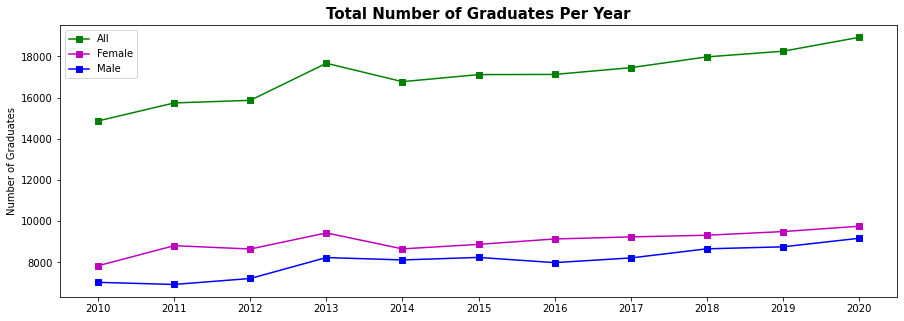

In [14]:
# (1) Plot Setting for Graph 1 (Line Graph) ************************************************************************************

fig, ax = plt.subplots(figsize = (15,5))

xlabels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
plt.title("Total Number of Graduates Per Year", fontweight='bold', fontsize = 15)
plt.ylabel("Number of Graduates")

plt.plot(xlabels, total_Graduates_Yearly, 'gs-', 
         xlabels, total_Female_Graduates_Yearly, 'ms-',
         xlabels, total_Male_Graduates_Yearly, 'bs-')
plt.legend(["All", "Female", "Male"])

plt.show()

In [15]:
# ******************************* (2) Graph 2: Total number of University Graduates, *******************************************
#               with proportion to Male & Female Per University in 2010 compared to 2020 (Stacked Bar Graph)

# First, collect statistics on the number of Female and of Both Gender's University Graduates in 2010 and 2020 *****************

# For 2010
year_2010_Male_Female = (dataset3["year"] == 2010) & (dataset3["sex"] == "Male & Female")
year_2010_Female = (dataset3["year"] == 2010) & (dataset3["sex"] == "Female")

# For 2020
year_2020_Male_Female = (dataset3["year"] == 2020) & (dataset3["sex"] == "Male & Female")
year_2020_Female = (dataset3["year"] == 2020) & (dataset3["sex"] == "Female")

In [16]:
# (2) For Graduates Per University in *2010* ***********************************************************************************

# Retrieve number of Both Genders Graduates per Uni in 2020
total_2010_NUS_Graduates = dataset3[year_2010_Male_Female]["nus"]
total_2010_NTU_Graduates = dataset3[year_2010_Male_Female]["ntu"]
total_2010_SMU_Graduates = dataset3[year_2010_Male_Female]["smu"]
total_2010_SIT_Graduates = dataset3[year_2010_Male_Female]["sit"]
total_2010_SUTD_Graduates = dataset3[year_2010_Male_Female]["sutd"]
total_2010_SUSS_Graduates = dataset3[year_2010_Male_Female]["suss"]
total_2010_NIE_Graduates = dataset3[year_2010_Male_Female]["nie"]

# Retrieve number of Female Graduates per Uni in 2020
total_2010_NUS_Graduates_Female = dataset3[year_2010_Female]["nus"]
total_2010_NTU_Graduates_Female = dataset3[year_2010_Female]["ntu"]
total_2010_SMU_Graduates_Female = dataset3[year_2010_Female]["smu"]
total_2010_SIT_Graduates_Female = dataset3[year_2010_Female]["sit"]
total_2010_SUTD_Graduates_Female = dataset3[year_2010_Female]["sutd"]
total_2010_SUSS_Graduates_Female = dataset3[year_2010_Female]["suss"]
total_2010_NIE_Graduates_Female = dataset3[year_2010_Female]["nie"]

# Calculate number of Male Graduates per Uni in 2020
total_2010_NUS_Graduates_Male = total_2010_NUS_Graduates[0] - total_2010_NUS_Graduates_Female[0]
total_2010_NTU_Graduates_Male = total_2010_NTU_Graduates[0] - total_2010_NTU_Graduates_Female[0]
total_2010_SMU_Graduates_Male = total_2010_SMU_Graduates[0] - total_2010_SMU_Graduates_Female[0]
total_2010_SIT_Graduates_Male = total_2010_SIT_Graduates[0] - total_2010_SIT_Graduates_Female[0]
total_2010_SUTD_Graduates_Male = total_2010_SUTD_Graduates[0] - total_2010_SUTD_Graduates_Female[0]
total_2010_SUSS_Graduates_Male = total_2010_SUSS_Graduates[0] - total_2010_SUSS_Graduates_Female[0]
total_2010_NIE_Graduates_Male = total_2010_NIE_Graduates[0] - total_2010_NIE_Graduates_Female[0]

# Calculate % Per Gender Per Uni in 2010 **************************************************************************************
# For NUS
NUS_2010_Male_Percent = (total_2010_NUS_Graduates_Male/total_2010_NUS_Graduates[0]) * 100
NUS_2010_Female_Percent = (total_2010_NUS_Graduates_Female[0]/total_2010_NUS_Graduates[0]) * 100

# For NTU
NTU_2010_Male_Percent = (total_2010_NTU_Graduates_Male/total_2010_NTU_Graduates[0]) * 100
NTU_2010_Female_Percent = (total_2010_NTU_Graduates_Female[0]/total_2010_NTU_Graduates[0]) * 100

# For SMU
SMU_2010_Male_Percent = (total_2010_SMU_Graduates_Male/total_2010_SMU_Graduates[0]) * 100
SMU_2010_Female_Percent = (total_2010_SMU_Graduates_Female[0]/total_2010_SMU_Graduates[0]) * 100

# For NIE
NIE_2010_Male_Percent = (total_2010_NIE_Graduates_Male/total_2010_NIE_Graduates[0]) * 100
NIE_2010_Female_Percent = (total_2010_NIE_Graduates_Female[0]/total_2010_NIE_Graduates[0]) * 100

# List to store number of Female Graduates per uni in 2020 ********************************************************************
Graduates2010_Per_Uni_Female = list([total_2010_NUS_Graduates_Female[0], total_2010_NTU_Graduates_Female[0], total_2010_SMU_Graduates_Female[0],
                                  total_2010_SIT_Graduates_Female[0], total_2010_SUTD_Graduates_Female[0], 
                                  total_2010_SUSS_Graduates_Female[0], total_2010_NIE_Graduates_Female[0]])

# List to store number of Male Graduates per uni in 2020
Graduates2010_Per_Uni_Male = list([total_2010_NUS_Graduates_Male, total_2010_NTU_Graduates_Male, total_2010_SMU_Graduates_Male,
                                  total_2010_SIT_Graduates_Male, total_2010_SUTD_Graduates_Male, 
                                  total_2010_SUSS_Graduates_Male, total_2010_NIE_Graduates_Male])

print(Graduates2010_Per_Uni_Female)
print(Graduates2010_Per_Uni_Male)

[3124, 2544, 546, 0, 0, 0, 1622]
[2709, 2868, 660, 0, 0, 0, 794]


In [17]:
# (2) For Graduates Per University in *2020* **********************************************************************************

# Retrieve number of Both Genders Graduates per Uni in 2020
total_2020_NUS_Graduates = dataset3[year_2020_Male_Female]["nus"]
total_2020_NTU_Graduates = dataset3[year_2020_Male_Female]["ntu"]
total_2020_SMU_Graduates = dataset3[year_2020_Male_Female]["smu"]
total_2020_SIT_Graduates = dataset3[year_2020_Male_Female]["sit"]
total_2020_SUTD_Graduates = dataset3[year_2020_Male_Female]["sutd"]
total_2020_SUSS_Graduates = dataset3[year_2020_Male_Female]["suss"]
total_2020_NIE_Graduates = dataset3[year_2020_Male_Female]["nie"]

# Retrieve number of Female Graduates per Uni in 2020
total_2020_NUS_Graduates_Female = dataset3[year_2020_Female]["nus"]
total_2020_NTU_Graduates_Female = dataset3[year_2020_Female]["ntu"]
total_2020_SMU_Graduates_Female = dataset3[year_2020_Female]["smu"]
total_2020_SIT_Graduates_Female = dataset3[year_2020_Female]["sit"]
total_2020_SUTD_Graduates_Female = dataset3[year_2020_Female]["sutd"]
total_2020_SUSS_Graduates_Female = dataset3[year_2020_Female]["suss"]
total_2020_NIE_Graduates_Female = dataset3[year_2020_Female]["nie"]

# Calculate number of Male Graduates per Uni in 2020
total_2020_NUS_Graduates_Male = total_2020_NUS_Graduates[0] - total_2020_NUS_Graduates_Female[0]
total_2020_NTU_Graduates_Male = total_2020_NTU_Graduates[0] - total_2020_NTU_Graduates_Female[0]
total_2020_SMU_Graduates_Male = total_2020_SMU_Graduates[0] - total_2020_SMU_Graduates_Female[0]
total_2020_SIT_Graduates_Male = total_2020_SIT_Graduates[0] - total_2020_SIT_Graduates_Female[0]
total_2020_SUTD_Graduates_Male = total_2020_SUTD_Graduates[0] - total_2020_SUTD_Graduates_Female[0]
total_2020_SUSS_Graduates_Male = total_2020_SUSS_Graduates[0] - total_2020_SUSS_Graduates_Female[0]
total_2020_NIE_Graduates_Male = total_2020_NIE_Graduates[0] - total_2020_NIE_Graduates_Female[0]


# Calculate % Per Gender Per Uni in 2010 **************************************************************************************
# For NUS
NUS_2020_Male_Percent = (total_2020_NUS_Graduates_Male/total_2020_NUS_Graduates[0]) * 100
NUS_2020_Female_Percent = (total_2020_NUS_Graduates_Female[0]/total_2020_NUS_Graduates[0]) * 100

# For NTU
NTU_2020_Male_Percent = (total_2020_NTU_Graduates_Male/total_2020_NTU_Graduates[0]) * 100
NTU_2020_Female_Percent = (total_2020_NTU_Graduates_Female[0]/total_2020_NTU_Graduates[0]) * 100

# For SMU
SMU_2020_Male_Percent = (total_2020_SMU_Graduates_Male/total_2020_SMU_Graduates[0]) * 100
SMU_2020_Female_Percent = (total_2020_SMU_Graduates_Female[0]/total_2020_SMU_Graduates[0]) * 100

# For SIT
SIT_2020_Male_Percent = (total_2020_SIT_Graduates_Male/total_2020_SIT_Graduates[0]) * 100
SIT_2020_Female_Percent = (total_2020_SIT_Graduates_Female[0]/total_2020_SIT_Graduates[0]) * 100

# For SUTD
SUTD_2020_Male_Percent = (total_2020_SUTD_Graduates_Male/total_2020_SUTD_Graduates[0]) * 100
SUTD_2020_Female_Percent = (total_2020_SUTD_Graduates_Female[0]/total_2020_SUTD_Graduates[0]) * 100

# For SUSS
SUSS_2020_Male_Percent = (total_2020_SUSS_Graduates_Male/total_2020_SUSS_Graduates[0]) * 100
SUSS_2020_Female_Percent = (total_2020_SUSS_Graduates_Female[0]/total_2020_SUSS_Graduates[0]) * 100

# For NIE
NIE_2020_Male_Percent = (total_2020_NIE_Graduates_Male/total_2020_NIE_Graduates[0]) * 100
NIE_2020_Female_Percent = (total_2020_NIE_Graduates_Female[0]/total_2020_NIE_Graduates[0]) * 100


# List to store number of Female Graduates per uni in 2020 *********************************************************************
Graduates2020_Per_Uni_Female = list([total_2020_NUS_Graduates_Female[0], total_2020_NTU_Graduates_Female[0], total_2020_SMU_Graduates_Female[0],
                                  total_2020_SIT_Graduates_Female[0], total_2020_SUTD_Graduates_Female[0], 
                                  total_2020_SUSS_Graduates_Female[0], total_2020_NIE_Graduates_Female[0]])

# List to store number of Male Graduates per uni in 2020
Graduates2020_Per_Uni_Male = list([total_2020_NUS_Graduates_Male, total_2020_NTU_Graduates_Male, total_2020_SMU_Graduates_Male,
                                  total_2020_SIT_Graduates_Male, total_2020_SUTD_Graduates_Male, 
                                  total_2020_SUSS_Graduates_Male, total_2020_NIE_Graduates_Male])

print(Graduates2020_Per_Uni_Female)
print(Graduates2020_Per_Uni_Male)

[3572, 2882, 1023, 890, 128, 259, 1000]
[3313, 2958, 860, 1282, 245, 122, 390]


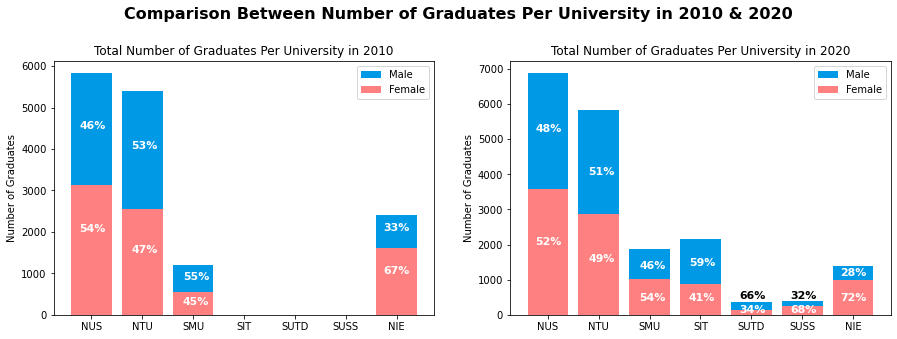

In [18]:
# (2) Plot Setting for Graph 2 (Stacked Bar Graph) *****************************************************************************

fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparison Between Number of Graduates Per University in 2010 & 2020', fontsize = 16, fontweight = 'bold')
fig.subplots_adjust(top = 0.83)

# Subplot 1
ax = fig.add_subplot(121)
ax.set_title('\nTotal Number of Graduates Per University in 2010')
plt.bar(["NUS", "NTU", "SMU", "SIT", "SUTD", "SUSS", "NIE"], Graduates2010_Per_Uni_Male, bottom = Graduates2010_Per_Uni_Female, color = '#0099e6')
plt.bar(["NUS", "NTU", "SMU", "SIT", "SUTD", "SUSS", "NIE"], Graduates2010_Per_Uni_Female, color = '#ff8080')
plt.ylabel("Number of Graduates")
plt.legend(["Male", "Female"])

# Add Text @ Locations
# For NUS
plt.text( -0.24, 4500, f"{NUS_2010_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( -0.24, 2000, f"{NUS_2010_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For NTU
plt.text( 0.79, 4000, f"{NTU_2010_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 0.79, 1500, f"{NTU_2010_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For SMU
plt.text( 1.8, 850, f"{SMU_2010_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 1.8, 250, f"{SMU_2010_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For NIE
plt.text( 5.75, 2020, f"{NIE_2010_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 5.75, 1000, f"{NIE_2010_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# Subplot 2
ax2 = fig.add_subplot(122)
ax2.set_title('\nTotal Number of Graduates Per University in 2020')
plt.bar(["NUS", "NTU", "SMU", "SIT", "SUTD", "SUSS", "NIE"], Graduates2020_Per_Uni_Male, bottom = Graduates2020_Per_Uni_Female, color = '#0099e6')
plt.bar(["NUS", "NTU", "SMU", "SIT", "SUTD", "SUSS", "NIE"], Graduates2020_Per_Uni_Female, color='#ff8080')
plt.ylabel("Number of Graduates")
plt.legend(["Male", "Female"])

# Add Text @ Locations
# For NUS
plt.text( -0.24, 5200, f"{NUS_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( -0.24, 2000, f"{NUS_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For NTU
plt.text( 0.79, 4000, f"{NTU_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 0.79, 1500, f"{NTU_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For SMU
plt.text( 1.8, 1300, f"{SMU_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 1.8, 400, f"{SMU_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For SIT
plt.text( 2.77, 1400, f"{SIT_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 2.77, 400, f"{SIT_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For SUTD
plt.text( 3.77, 450, f"{SUTD_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "k")
plt.text( 3.77, 50, f"{SUTD_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For SUSS
plt.text( 4.77, 450, f"{SUSS_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "k")
plt.text( 4.77, 50, f"{SUSS_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

# For NIE
plt.text( 5.75, 1100, f"{NIE_2020_Male_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")
plt.text( 5.75, 400, f"{NIE_2020_Female_Percent:.0f}%", fontsize = 11, fontweight='bold', color = "w")

plt.show()

In [19]:
# **** (3) Graph 3: Proportion of Female to Male Graduates per 15 University Course in 2020 compared to in 2010 (Pie Chart) ***

# First, collect statistics on the number of Female and of Both Gender's Graduates Per Course in 2010 & 2020 ******************

# For Data in 2010
dataset2_2010_Male_Female = (dataset2["year"] == 2010) & (dataset2["sex"] == "Male & Female")
dataset2_2010_Female = (dataset2["year"] == 2010) & (dataset2["sex"] == "Female")
dataset2_Courses = list(np.unique(dataset2['course']))

# 1. For Both Genders
# Retrieve number of male and female graduates per course
dataset2_2010_Male_Female_Graduates = list(dataset2[dataset2_2010_Male_Female]["graduates"])

# Create a dictionary to store Number of Graduates for Each Course
dictionary_Graduates_Per_Courses_2010 = {}
for key in dataset2_Courses:
    for value in dataset2_2010_Male_Female_Graduates:
        dictionary_Graduates_Per_Courses_2010[key] = value
        dataset2_2010_Male_Female_Graduates.remove(value)
        break
        
print("\n", dictionary_Graduates_Per_Courses_2010)

#  2. For Female Graduates
# Retrieve number of male and female graduates per course
dataset2_2010_Female_Graduates = list(dataset2[dataset2_2010_Female]["graduates"])

# Create a dictionary to store Number of Graduates for Each Course
dictionary_Female_Graduates_Per_Courses_2010 = {}
for key in dataset2_Courses:
    for value in dataset2_2010_Female_Graduates:
        dictionary_Female_Graduates_Per_Courses_2010[key] = value
        dataset2_2010_Female_Graduates.remove(value)
        break
        
print("\n", dictionary_Female_Graduates_Per_Courses_2010)

# 3. For Male Graduates
dictionary_Male_Graduates_Per_Courses_2010 = {}
dictionary_Male_Graduates_Per_Courses_2010 = {key: dictionary_Graduates_Per_Courses_2010[key] - dictionary_Female_Graduates_Per_Courses_2010.get(key, 0)
                       for key in dictionary_Graduates_Per_Courses_2010.keys()}
print("\n", dictionary_Male_Graduates_Per_Courses_2010)


 {'Accountancy': 933, 'Architecture, Building & Real Estate': 263, 'Business & Administration': 1514, 'Dentistry': 41, 'Education': 0, 'Engineering Sciences': 3786, 'Fine & Applied Arts': 205, 'Health Sciences': 235, 'Humanities & Social Sciences': 2381, 'Information Technology': 631, 'Law': 227, 'Mass Communication': 177, 'Medicine': 228, 'Natural, Physical & Mathematical Sciences': 1766, 'Services': 64}

 {'Accountancy': 553, 'Architecture, Building & Real Estate': 173, 'Business & Administration': 856, 'Dentistry': 25, 'Education': 0, 'Engineering Sciences': 946, 'Fine & Applied Arts': 121, 'Health Sciences': 196, 'Humanities & Social Sciences': 1645, 'Information Technology': 162, 'Law': 89, 'Mass Communication': 147, 'Medicine': 94, 'Natural, Physical & Mathematical Sciences': 1172, 'Services': 35}

 {'Accountancy': 380, 'Architecture, Building & Real Estate': 90, 'Business & Administration': 658, 'Dentistry': 16, 'Education': 0, 'Engineering Sciences': 2840, 'Fine & Applied Arts

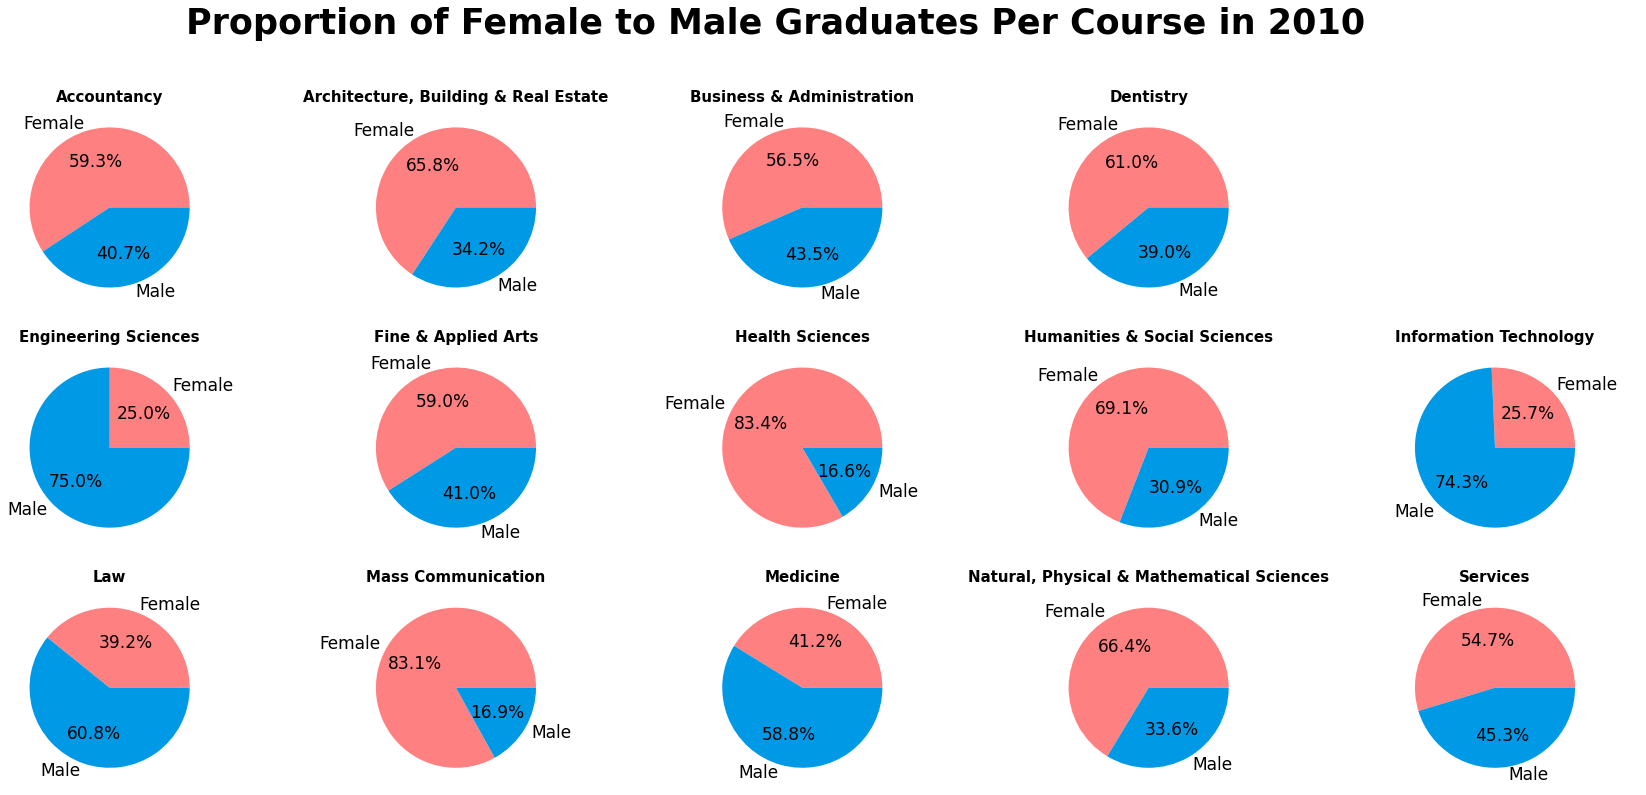

In [20]:
# (3) Plot Setting for Graph 3 for Year 2010 (Pie Chart) ***********************************************************************

fig, ax = plt.subplots(3,5, figsize = (30,14))

fig.suptitle("Proportion of Female to Male Graduates Per Course in 2010", fontsize = 35, fontweight='bold',  y = 0.9)
fig.subplots_adjust(top = 0.8)
labels = ["Female", "Male"]
colors = ["#ff8080", "#0099e6"]

# (3) Plot Setting for Pie Chart for 2010 for Respective Courses, **************************************************************
# dictionary_Female_Graduates_Per_Courses_2010 & dictionary_Male_Graduates_Per_Courses_2010

plt.figure(1)

ax[0,0].pie([dictionary_Female_Graduates_Per_Courses_2010["Accountancy"], dictionary_Male_Graduates_Per_Courses_2010["Accountancy"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,0].set_title("Accountancy", fontsize=15, fontweight = "bold")

ax[0,1].pie([dictionary_Female_Graduates_Per_Courses_2010["Architecture, Building & Real Estate"],
             dictionary_Male_Graduates_Per_Courses_2010["Architecture, Building & Real Estate"]],
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,1].set_title("Architecture, Building & Real Estate", fontsize=15, fontweight = "bold")

ax[0,2].pie([dictionary_Female_Graduates_Per_Courses_2010["Business & Administration"], 
             dictionary_Male_Graduates_Per_Courses_2010["Business & Administration"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,2].set_title("Business & Administration", fontsize=15, fontweight = "bold")

ax[0,3].pie([dictionary_Female_Graduates_Per_Courses_2010["Dentistry"], dictionary_Male_Graduates_Per_Courses_2010["Dentistry"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,3].set_title("Dentistry", fontsize=15, fontweight = "bold")

# The course Education was not introducecd in 2010
ax[0,4].axis("off")

ax[1,0].pie([dictionary_Female_Graduates_Per_Courses_2010["Engineering Sciences"], dictionary_Male_Graduates_Per_Courses_2010["Engineering Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,0].set_title("Engineering Sciences", fontsize=15, fontweight = "bold")

ax[1,1].pie([dictionary_Female_Graduates_Per_Courses_2010["Fine & Applied Arts"], dictionary_Male_Graduates_Per_Courses_2010["Fine & Applied Arts"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,1].set_title("Fine & Applied Arts", fontsize=15, fontweight = "bold")

ax[1,2].pie([dictionary_Female_Graduates_Per_Courses_2010["Health Sciences"], dictionary_Male_Graduates_Per_Courses_2010["Health Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,2].set_title("Health Sciences", fontsize=15, fontweight = "bold")

ax[1,3].pie([dictionary_Female_Graduates_Per_Courses_2010["Humanities & Social Sciences"], dictionary_Male_Graduates_Per_Courses_2010["Humanities & Social Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,3].set_title("Humanities & Social Sciences", fontsize=15, fontweight = "bold")

ax[1,4].pie([dictionary_Female_Graduates_Per_Courses_2010["Information Technology"], dictionary_Male_Graduates_Per_Courses_2010["Information Technology"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,4].set_title("Information Technology", fontsize=15, fontweight = "bold")

ax[2,0].pie([dictionary_Female_Graduates_Per_Courses_2010["Law"], dictionary_Male_Graduates_Per_Courses_2010["Law"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,0].set_title("Law", fontsize=15, fontweight = "bold")

ax[2,1].pie([dictionary_Female_Graduates_Per_Courses_2010["Mass Communication"], dictionary_Male_Graduates_Per_Courses_2010["Mass Communication"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,1].set_title("Mass Communication", fontsize=15, fontweight = "bold")

ax[2,2].pie([dictionary_Female_Graduates_Per_Courses_2010["Medicine"], dictionary_Male_Graduates_Per_Courses_2010["Medicine"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,2].set_title("Medicine", fontsize=15, fontweight = "bold")

ax[2,3].pie([dictionary_Female_Graduates_Per_Courses_2010["Natural, Physical & Mathematical Sciences"], dictionary_Male_Graduates_Per_Courses_2010["Natural, Physical & Mathematical Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,3].set_title("Natural, Physical & Mathematical Sciences", fontsize=15, fontweight = "bold")

ax[2,4].pie([dictionary_Female_Graduates_Per_Courses_2010["Services"], dictionary_Male_Graduates_Per_Courses_2010["Services"]],
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,4].set_title("Services", fontsize=15, fontweight = "bold")

plt.show()

In [21]:
# **** (4) Graph 4: Proportion of Female to Male Graduates per 15 University Course in 2020 compared to in 2010 (Pie Chart) ***

# First, collect statistics on the number of Female and of Both Gender's Graduates Per Course  in 2010 and 2020

# For Data in 2020
dataset2_2020_Male_Female = (dataset2["year"] == 2020) & (dataset2["sex"] == "Male & Female")
dataset2_2020_Female = (dataset2["year"] == 2020) & (dataset2["sex"] == "Female")
dataset2_Courses = list(np.unique(dataset2['course']))

# 1. For Both Genders
# Retrieve number of male and female graduates per course
dataset2_2020_Male_Female_Graduates = list(dataset2[dataset2_2020_Male_Female]["graduates"])

# Create a dictionary to store Number of Graduates for Each Course
dictionary_Graduates_Per_Courses_2020 = {}
for key in dataset2_Courses:
    for value in dataset2_2020_Male_Female_Graduates:
        dictionary_Graduates_Per_Courses_2020[key] = value
        dataset2_2020_Male_Female_Graduates.remove(value)
        break
        
print("\n", dictionary_Graduates_Per_Courses_2020)

#  2. For Female Graduates
# Retrieve number of male and female graduates per course
dataset2_2020_Female_Graduates = list(dataset2[dataset2_2020_Female]["graduates"])

# Create a dictionary to store Number of Graduates for Each Course
dictionary_Female_Graduates_Per_Courses_2020 = {}
for key in dataset2_Courses:
    for value in dataset2_2020_Female_Graduates:
        dictionary_Female_Graduates_Per_Courses_2020[key] = value
        dataset2_2020_Female_Graduates.remove(value)
        break
        
print("\n", dictionary_Female_Graduates_Per_Courses_2020)

# 3. For Male Graduates
dictionary_Male_Graduates_Per_Courses_2020 = {}
dictionary_Male_Graduates_Per_Courses_2020 = {key: dictionary_Graduates_Per_Courses_2020[key] - dictionary_Female_Graduates_Per_Courses_2020.get(key, 0)
                       for key in dictionary_Graduates_Per_Courses_2020.keys()}
print("\n", dictionary_Male_Graduates_Per_Courses_2020)


 {'Accountancy': 1411, 'Architecture, Building & Real Estate': 426, 'Business & Administration': 2105, 'Dentistry': 51, 'Education': 145, 'Engineering Sciences': 4621, 'Fine & Applied Arts': 429, 'Health Sciences': 724, 'Humanities & Social Sciences': 3147, 'Information Technology': 1367, 'Law': 394, 'Mass Communication': 181, 'Medicine': 386, 'Natural, Physical & Mathematical Sciences': 1928, 'Services': 219}

 {'Accountancy': 812, 'Architecture, Building & Real Estate': 258, 'Business & Administration': 1209, 'Dentistry': 35, 'Education': 115, 'Engineering Sciences': 1246, 'Fine & Applied Arts': 272, 'Health Sciences': 522, 'Humanities & Social Sciences': 2125, 'Information Technology': 397, 'Law': 204, 'Mass Communication': 142, 'Medicine': 178, 'Natural, Physical & Mathematical Sciences': 1127, 'Services': 112}

 {'Accountancy': 599, 'Architecture, Building & Real Estate': 168, 'Business & Administration': 896, 'Dentistry': 16, 'Education': 30, 'Engineering Sciences': 3375, 'Fine 

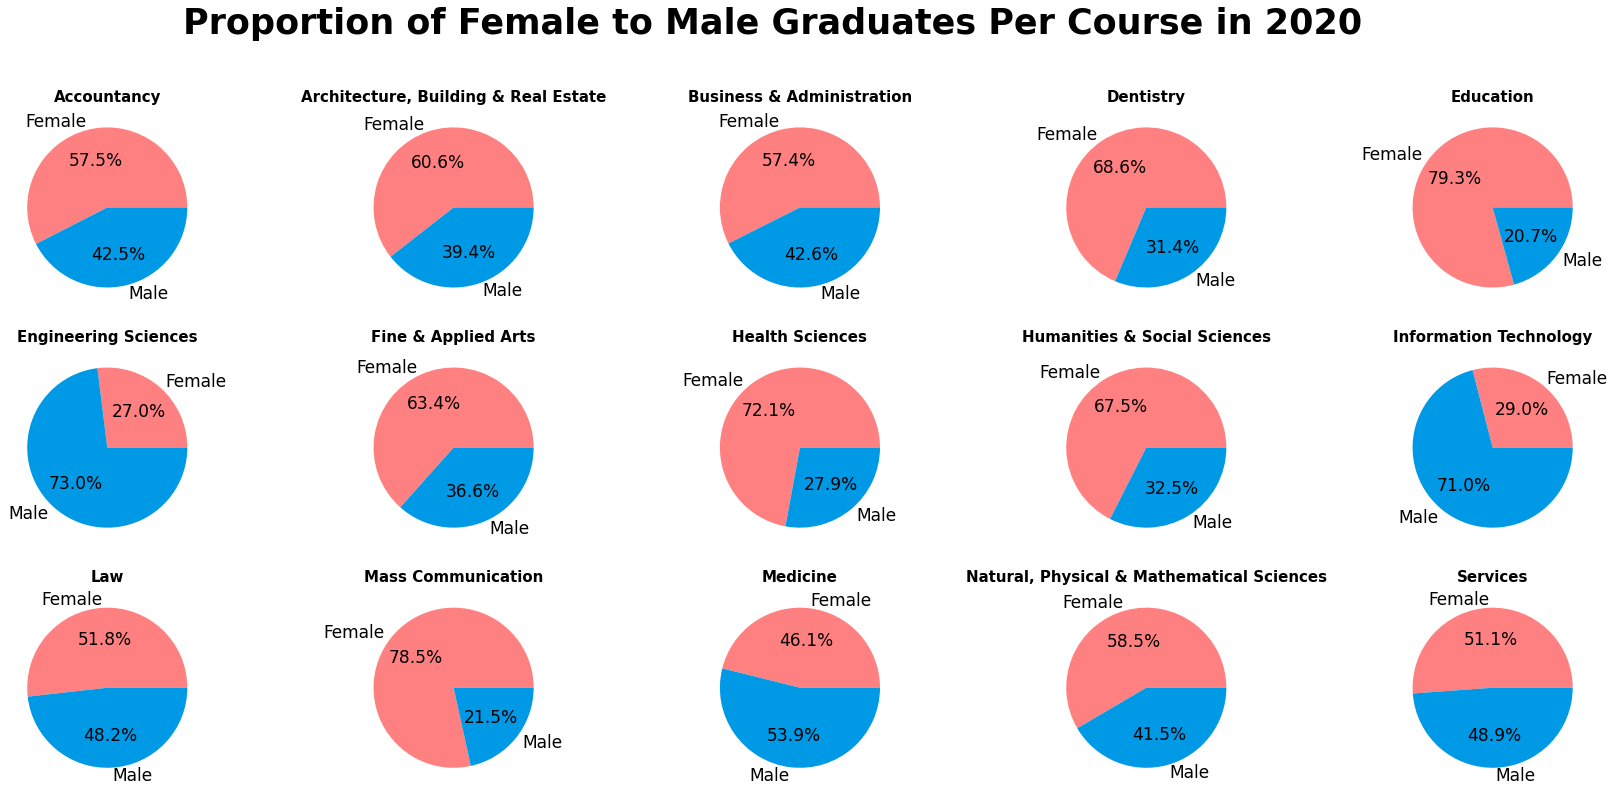

In [22]:
# (4) Plot Setting for Graph 4 for Year 2020 (Pie Chart) ***********************************************************************

fig, ax = plt.subplots(3,5, figsize = (30,14))

fig.suptitle("Proportion of Female to Male Graduates Per Course in 2020", fontsize = 35, fontweight='bold',  y = 0.9)
fig.subplots_adjust(top = 0.8)
labels = ["Female", "Male"]
colors = ["#ff8080", "#0099e6"]

# (A) Plot Setting for Pie Chart for 2010 for Respective Courses, 
#     dictionary_Female_Graduates_Per_Courses_2020 & dictionary_Male_Graduates_Per_Courses_2020

ax[0,0].pie([dictionary_Female_Graduates_Per_Courses_2020["Accountancy"], dictionary_Male_Graduates_Per_Courses_2020["Accountancy"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,0].set_title("Accountancy", fontsize=15, fontweight = "bold")

ax[0,1].pie([dictionary_Female_Graduates_Per_Courses_2020["Architecture, Building & Real Estate"],
             dictionary_Male_Graduates_Per_Courses_2020["Architecture, Building & Real Estate"]],
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,1].set_title("Architecture, Building & Real Estate", fontsize=15, fontweight = "bold")

ax[0,2].pie([dictionary_Female_Graduates_Per_Courses_2020["Business & Administration"], 
             dictionary_Male_Graduates_Per_Courses_2020["Business & Administration"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,2].set_title("Business & Administration", fontsize=15, fontweight = "bold")

ax[0,3].pie([dictionary_Female_Graduates_Per_Courses_2020["Dentistry"], dictionary_Male_Graduates_Per_Courses_2020["Dentistry"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,3].set_title("Dentistry", fontsize=15, fontweight = "bold")

ax[0,4].pie([dictionary_Female_Graduates_Per_Courses_2020["Education"], dictionary_Male_Graduates_Per_Courses_2020["Education"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[0,4].set_title("Education", fontsize=15, fontweight = "bold")

ax[1,0].pie([dictionary_Female_Graduates_Per_Courses_2020["Engineering Sciences"], dictionary_Male_Graduates_Per_Courses_2020["Engineering Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,0].set_title("Engineering Sciences", fontsize=15, fontweight = "bold")

ax[1,1].pie([dictionary_Female_Graduates_Per_Courses_2020["Fine & Applied Arts"], dictionary_Male_Graduates_Per_Courses_2020["Fine & Applied Arts"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,1].set_title("Fine & Applied Arts", fontsize=15, fontweight = "bold")

ax[1,2].pie([dictionary_Female_Graduates_Per_Courses_2020["Health Sciences"], dictionary_Male_Graduates_Per_Courses_2020["Health Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,2].set_title("Health Sciences", fontsize=15, fontweight = "bold")

ax[1,3].pie([dictionary_Female_Graduates_Per_Courses_2020["Humanities & Social Sciences"], dictionary_Male_Graduates_Per_Courses_2020["Humanities & Social Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,3].set_title("Humanities & Social Sciences", fontsize=15, fontweight = "bold")

ax[1,4].pie([dictionary_Female_Graduates_Per_Courses_2020["Information Technology"], dictionary_Male_Graduates_Per_Courses_2020["Information Technology"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[1,4].set_title("Information Technology", fontsize=15, fontweight = "bold")

ax[2,0].pie([dictionary_Female_Graduates_Per_Courses_2020["Law"], dictionary_Male_Graduates_Per_Courses_2020["Law"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,0].set_title("Law", fontsize=15, fontweight = "bold")

ax[2,1].pie([dictionary_Female_Graduates_Per_Courses_2020["Mass Communication"], dictionary_Male_Graduates_Per_Courses_2020["Mass Communication"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,1].set_title("Mass Communication", fontsize=15, fontweight = "bold")

ax[2,2].pie([dictionary_Female_Graduates_Per_Courses_2020["Medicine"], dictionary_Male_Graduates_Per_Courses_2020["Medicine"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,2].set_title("Medicine", fontsize=15, fontweight = "bold")

ax[2,3].pie([dictionary_Female_Graduates_Per_Courses_2020["Natural, Physical & Mathematical Sciences"], dictionary_Male_Graduates_Per_Courses_2020["Natural, Physical & Mathematical Sciences"]], 
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,3].set_title("Natural, Physical & Mathematical Sciences", fontsize=15, fontweight = "bold")

ax[2,4].pie([dictionary_Female_Graduates_Per_Courses_2020["Services"], dictionary_Male_Graduates_Per_Courses_2020["Services"]],
            labels = labels, autopct='%1.1f%%', colors = colors, textprops = {"fontsize":17})
ax[2,4].set_title("Services", fontsize=15, fontweight = "bold")

plt.show()

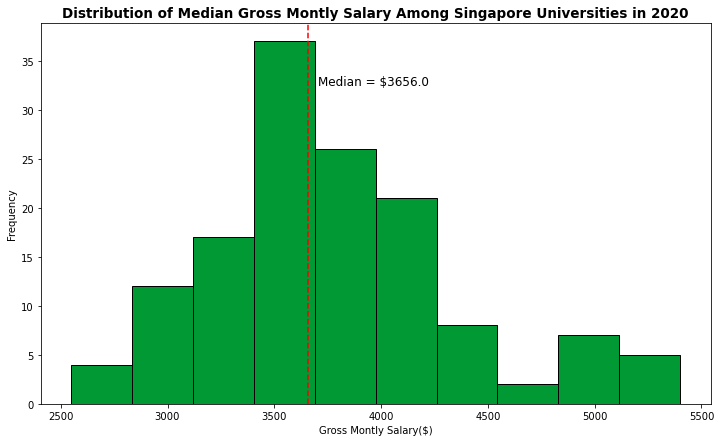

In [23]:
# ************** (5) Graph 5: Distribution of Median Gross Montly Salary Among Universities in 2020 (Histogram) *****************

# First, collect statistics on basic montly median salariess from all Universities in 2020

# For Data in 2020
# Retrieve all records of gross monthly median salaries in 2020
dataset1_2020_gross_montly_median_salaries = dataset1[dataset1["year"] == 2020]["gross_monthly_median"]

# (5) Plot Setting for Graph 5 for Year 2020 (Histogram) ***********************************************************************
# Generate Histogram
plt.figure(figsize = (12, 7))
plt.hist(list(dataset1_2020_gross_montly_median_salaries), color = "#009933", edgecolor = "black")

plt.title("Distribution of Median Gross Montly Salary Among Singapore Universities in 2020", fontsize = 13.5, fontweight='bold')
plt.xlabel("Gross Montly Salary($)")
plt.ylabel("Frequency")

# Line to represent the Overall Median Gross Monthly Salary of the Histogram
plt.axvline(np.median(dataset1_2020_gross_montly_median_salaries), color ="#ff0000", linestyle = 'dashed', linewidth = 1.5)
# Add Text @ Location for Median
plt.text(np.median(dataset1_2020_gross_montly_median_salaries) + 50 , 32.5, f"Median = ${np.median(dataset1_2020_gross_montly_median_salaries.round(2))}", fontsize = 12)

plt.show()

In [24]:
# **************** (6) Graph 6: Compare Gross Monthly Income Across the Universities in 2020 (Boxplot) *************************

# For Data in 2020
# Retrieve all records in 2020 *************************************************************************************************
dataset1_2020 = dataset1[dataset1["year"] == 2020]

# Retrieve records for the respective Universities *****************************************************************************

# Check for unqiue values of University
dataset1_Universities = np.unique(dataset1['university'])
# print(f'\nCourses accounted for are {list(dataset1_Universities)}.')


# 1. NTU Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_NTU = dataset1_2020[dataset1_2020['university'] == 'Nanyang Technological University']
# print(len(dataset1_2020_NTU)) # check number of records
dataset1_2020_NTU_Salaries = dataset1_2020_NTU['gross_monthly_median']
# print(dataset1_2020_NTU_Salaries)


# 2. NUS Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_NUS = dataset1_2020[dataset1_2020['university'] == 'National University of Singapore']
# print(len(dataset1_2020_NUS)) # check number of records
dataset1_2020_NUS_Salaries = dataset1_2020_NUS['gross_monthly_median']
# print(dataset1_2020_NUS_Salaries)


# 3. SIT Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_SIT = dataset1_2020[dataset1_2020['university'] == 'Singapore Institute of Technology']
# print(len(dataset1_2020_SIT)) # check number of records
dataset1_2020_SIT_Salaries = dataset1_2020_SIT['gross_monthly_median']
# print(dataset1_2020_SIT_Salaries)


# 4. SMU Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_SMU = dataset1_2020[dataset1_2020['university'] == 'Singapore Management University']
# print(len(dataset1_2020_SMU)) # check number of records
dataset1_2020_SMU_Salaries = dataset1_2020_SMU['gross_monthly_median']
# print(dataset1_2020_SMU_Salaries)


# 5. SUSS Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_SUSS = dataset1_2020[dataset1_2020['university'] == 'Singapore University of Social Sciences']
# print(len(dataset1_2020_SUSS)) # check number of records
dataset1_2020_SUSS_Salaries = dataset1_2020_SUSS['gross_monthly_median']
# print(dataset1_2020_SUSS_Salaries)


# 6. SUTD Year 2020 Records for Gross Monthly Median Salary
dataset1_2020_SUTD = dataset1_2020[dataset1_2020['university'] == 'Singapore University of Technology and Design']
# print(len(dataset1_2020_SUTD)) # check number of records
dataset1_2020_SUTD_Salaries = dataset1_2020_SUTD['gross_monthly_median']
# print(dataset1_2020_SUTD_Salaries)

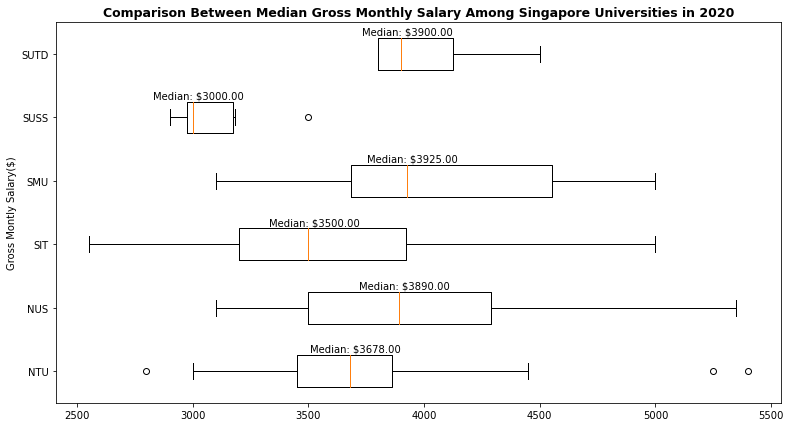

In [25]:
# (6) Plot Setting for Graph 6 for Year 2020 (Boxplot) *************************************************************************

plt.figure(figsize = (13, 7))

boxplot = plt.boxplot([dataset1_2020_NTU_Salaries, dataset1_2020_NUS_Salaries, dataset1_2020_SIT_Salaries, dataset1_2020_SMU_Salaries, dataset1_2020_SUSS_Salaries, dataset1_2020_SUTD_Salaries],
            labels = ["NTU", "NUS", "SIT", "SMU", "SUSS", "SUTD"], vert = False)

plt.title("Comparison Between Median Gross Monthly Salary Among Singapore Universities in 2020", fontsize = 12.5, fontweight='heavy')
plt.ylabel("Gross Montly Salary($)")

# Get *Median* of All Boxplots
# Add Texts @ Locations for Median
for line in boxplot["medians"]:
    x, y = line.get_xydata()[1]
    plt.text(x - 170, y + 0.05, f'Median: ${x:.2f}')

plt.show()